In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import matplotlib as mpl
import matplotlib.pyplot as plt


In [5]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [3]:
table_target = pd.read_csv('/Users/JQC/Desktop/data2/rawdata/table_0.csv')
user_info = pd.read_csv('/Users/JQC/Desktop/data2/rawdata/table_1.csv')
order_info = pd.read_csv('/Users/JQC/Desktop/data2/rawdata/table_2.csv')
action_info = pd.read_csv('/Users/JQC/Desktop/data2/rawdata/table_3.csv')


In [97]:
table_target.head()
user_info.head()
order_info.head()
action_info.head()

,userid,orderType
0,100000000013,0
1,100000000111,0
2,100000000127,0
3,100000000231,0
4,100000000379,0


,userid,gender,province,age
0,100000000013,男,未知,60后
1,100000000111,未知,上海,未知
2,100000000127,未知,上海,未知
3,100000000231,男,北京,70后
4,100000000379,男,北京,未知


,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,1481714516,0,柏林,德国,欧洲
1,100000000013,1000014,1501959643,0,旧金山,美国,北美洲
2,100000000393,1000033,1499440296,0,巴黎,法国,欧洲
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲
4,100000000459,1000034,1479146723,0,巴厘岛,印度尼西亚,亚洲


,userid,actionType,actionTime
0,100000000013,1,1474300753
1,100000000013,5,1474300763
2,100000000013,6,1474300874
3,100000000013,5,1474300911
4,100000000013,6,1474300936


In [5]:
# 查看样本标签 
table_target.orderType.value_counts()

0    33682
1     6625
Name: orderType, dtype: int64

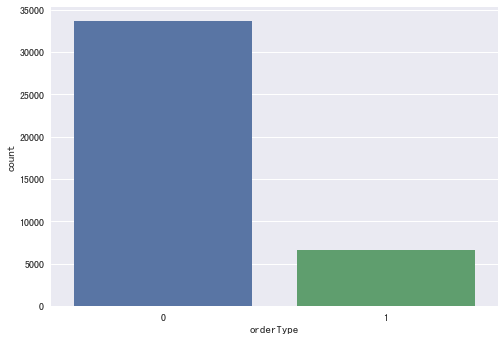

In [37]:
sns.countplot(table_target['orderType'], 
#               palette='Set3'
             )

In [6]:
# 查看用户量
table_target.userid.nunique(), user_info.userid.nunique(), order_info.userid.nunique(), action_info.userid.nunique()

(40307, 40307, 10637, 40307)

In [7]:
# 由下面结果可以看出 只有user_info这张表有缺失值 age,gender存在大量值缺失
table_target.info()
user_info.info()
order_info.info()
action_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40307 entries, 0 to 40306
Data columns (total 2 columns):
userid       40307 non-null int64
orderType    40307 non-null int64
dtypes: int64(2)
memory usage: 629.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40307 entries, 0 to 40306
Data columns (total 4 columns):
userid      40307 non-null int64
gender      15760 non-null object
province    36412 non-null object
age         4742 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20653 entries, 0 to 20652
Data columns (total 7 columns):
userid       20653 non-null int64
orderid      20653 non-null int64
orderTime    20653 non-null int64
orderType    20653 non-null int64
city         20653 non-null object
country      20653 non-null object
continent    20653 non-null object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334856 entries, 0 to 1334855
Data columns 

In [8]:
# 查看describe所有支持的统计量
user_info.describe(include='all')
action_info.describe(include='all')

,userid,gender,province,age
count,4.030700e+04,15760,36412,4742
unique,NaN,2,31,5
top,NaN,女,上海,80后
freq,NaN,8620,9760,1667
mean,1.119145e+11,NaN,NaN,NaN
std,1.869774e+09,NaN,NaN,NaN
min,1.000000e+11,NaN,NaN,NaN
25%,1.109180e+11,NaN,NaN,NaN
50%,1.114490e+11,NaN,NaN,NaN
75%,1.126073e+11,NaN,NaN,NaN


,userid,actionType,actionTime
count,1.334856e+06,1.334856e+06,1.334856e+06
mean,1.118264e+11,3.927026e+00,1.492813e+09
std,2.129090e+09,2.168196e+00,7.462602e+06
min,1.000000e+11,1.000000e+00,1.471119e+09
25%,1.109112e+11,1.000000e+00,1.490399e+09
50%,1.114479e+11,5.000000e+00,1.494337e+09
75%,1.126228e+11,5.000000e+00,1.498066e+09
max,1.149998e+11,9.000000e+00,1.505088e+09


In [9]:
action_info.actionType.unique()

array([1, 5, 6, 8, 9, 4, 7, 3, 2])

## 数据探索


In [12]:
# 缺失值暂时都填充未知
user_info = user_info.fillna("未知")

In [13]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40307 entries, 0 to 40306
Data columns (total 4 columns):
userid      40307 non-null int64
gender      40307 non-null object
province    40307 non-null object
age         40307 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [14]:
user_info.gender.value_counts()
user_info.province.value_counts().head(10)
user_info.age.value_counts()


未知    24547
女      8620
男      7140
Name: gender, dtype: int64

上海    9760
北京    8301
广东    4784
未知    3895
江苏    2813
浙江    2447
四川    1310
湖北     741
辽宁     725
天津     722
Name: province, dtype: int64

未知     35565
80后     1667
70后     1308
60后     1061
90后      621
00后       85
Name: age, dtype: int64

<BarContainer object of 3 artists>

Text(0.5, 0, 'gender')

<BarContainer object of 6 artists>

Text(0.5, 0, 'age')

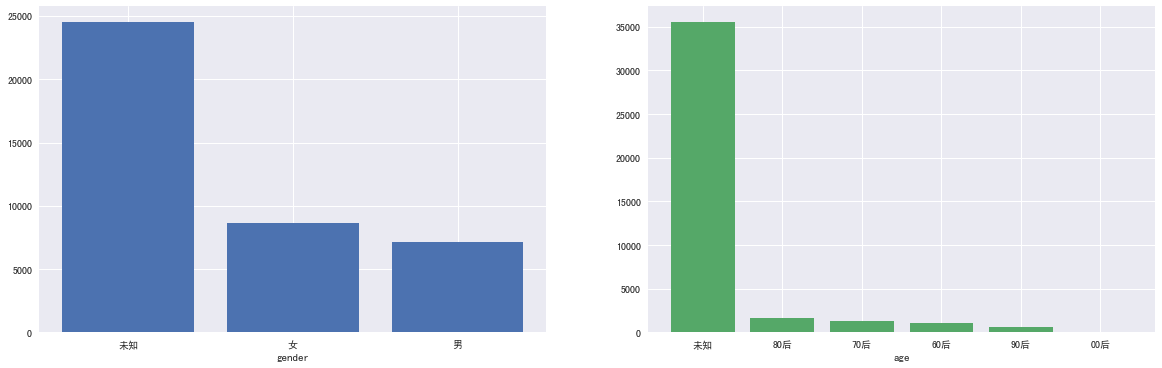

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
# 返回一个画板
palette = sns.color_palette()
ax[0].bar(user_info.gender.value_counts().index, user_info.gender.value_counts(), color=palette[0])
ax[0].set_xlabel(user_info.iloc[:,1].value_counts().name)

ax[1].bar(user_info.age.value_counts().index, user_info.age.value_counts(), color=palette[1])
ax[1].set_xlabel(user_info.age.value_counts().name)


<BarContainer object of 32 artists>

Text(0.5, 0, 'province')

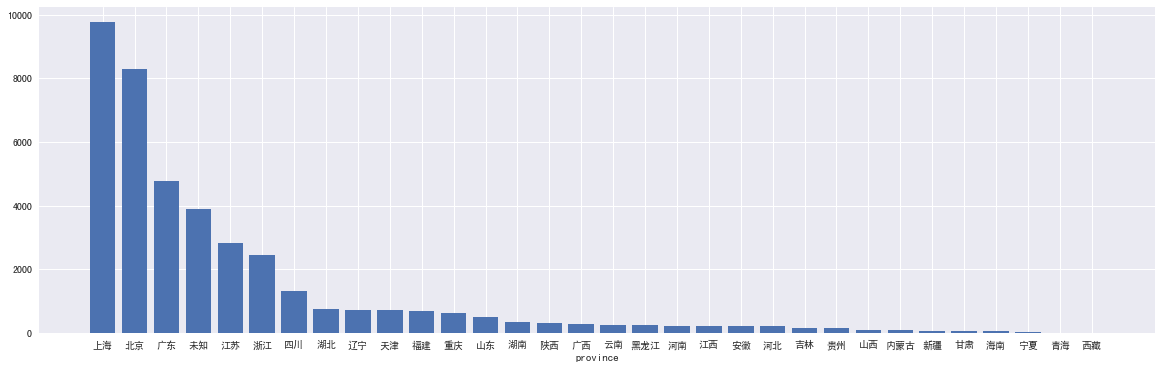

In [43]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 6)
palette = sns.color_palette()
ax.bar(user_info.province.value_counts().index, user_info.province.value_counts())
ax.set_xlabel(user_info.province.value_counts().name)
ax.set_label('省份精品订单情况')

In [20]:
user_orderType = user_info.merge(table_target, on='userid', how='left')
user_orderType.head()

,userid,gender,province,age,orderType
0,100000000013,男,未知,60后,0
1,100000000111,未知,上海,未知,0
2,100000000127,未知,上海,未知,0
3,100000000231,男,北京,70后,0
4,100000000379,男,北京,未知,0


In [31]:
gender_orderType = user_orderType.groupby('gender', as_index=False)['orderType'].agg({'总数': np.size, '精品订单数': np.sum})
gender_orderType['精品订单率'] = gender_orderType['精品订单数'] / gender_orderType['总数']
gender_orderType

,gender,总数,精品订单数,精品订单率
0,女,8620,1674,0.194200
1,未知,24547,3730,0.151953
2,男,7140,1221,0.171008


In [38]:
province_orderType = user_orderType.groupby('province', as_index=False)['orderType']\
    .agg({'总数': np.size, '精品订单数': np.sum})
province_orderType['精品订单率'] = province_orderType['精品订单数'] / province_orderType['总数']
province_orderType.sort_values(by='精品订单数', ascending=False)
province_orderType.head()

,province,总数,精品订单数,精品订单率
0,上海,9760,1781,0.182480
3,北京,8301,1589,0.191423
11,广东,4784,765,0.159908
14,未知,3895,580,0.148909
15,江苏,2813,417,0.148240
19,浙江,2447,337,0.137720
5,四川,1310,162,0.123664
6,天津,722,124,0.171745
27,辽宁,725,105,0.144828
24,福建,693,104,0.150072


,province,总数,精品订单数,精品订单率
0,上海,9760,1781,0.182480
1,云南,242,42,0.173554
2,内蒙古,79,13,0.164557
3,北京,8301,1589,0.191423
4,吉林,143,23,0.160839


In [42]:
age_orderType = user_orderType.groupby('age', as_index=False)['orderType'].agg({'总数': np.size, '精品订单数': np.sum})
age_orderType['精品订单率'] = age_orderType['精品订单数'] / age_orderType['总数']
age_orderType.sort_values(by='精品订单数', ascending=False, inplace=True)
age_orderType

,age,总数,精品订单数,精品订单率
5,未知,35565,5754,0.161788
3,80后,1667,320,0.191962
2,70后,1308,248,0.189602
1,60后,1061,193,0.181904
4,90后,621,96,0.154589
0,00后,85,14,0.164706


<BarContainer object of 3 artists>

Text(0.5, 0, '性别精品订单情况')

<BarContainer object of 6 artists>

Text(0.5, 0, '年龄精品订单情况')

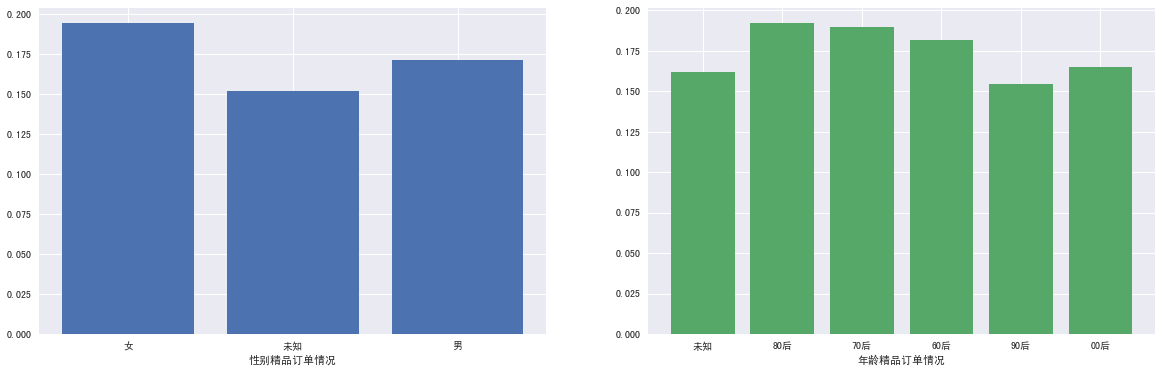

In [51]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 6)
palette = sns.color_palette()
ax[0].bar(gender_orderType.gender, gender_orderType['精品订单率'], color=palette[0])
ax[0].set_xlabel('性别精品订单情况')

ax[1].bar(age_orderType.age, age_orderType['精品订单率'], color=palette[1])
ax[1].set_xlabel('年龄精品订单情况')

<BarContainer object of 32 artists>

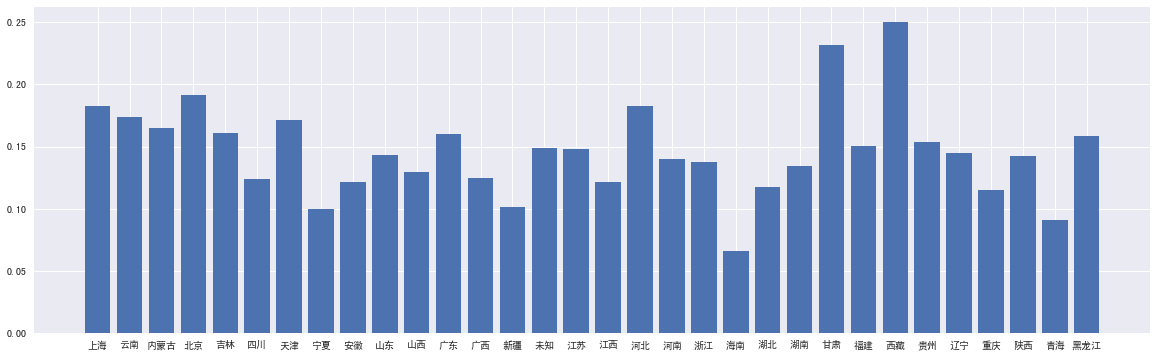

In [52]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 6)

palette = sns.color_palette()
ax.bar(province_orderType.province, province_orderType['精品订单率'])
ax.set_label('省份精品订单率')

##  order_info 表筛选变量

In [53]:
order_info.head()

,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,1481714516,0,柏林,德国,欧洲
1,100000000013,1000014,1501959643,0,旧金山,美国,北美洲
2,100000000393,1000033,1499440296,0,巴黎,法国,欧洲
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲
4,100000000459,1000034,1479146723,0,巴厘岛,印度尼西亚,亚洲


In [57]:
def type_count(df,type,args):
    count = len(df[df.loc[:,args]==type])
    return count

# 用户订单中精品订单数和普通订单数
type1_amount = order_info.groupby(by='userid').apply(type_count, 1, 'orderType')
type0_amount = order_info.groupby(by='userid').apply(type_count, 0, 'orderType')

In [59]:
type1_amount = pd.DataFrame(type1_amount, columns=['F2.3'])
type0_amount = pd.DataFrame(type0_amount, columns=['F2.0'])

type1_amount.head()
type0_amount.head()

,F2.3
userid,
100000000013,0
100000000393,0
100000000459,0
100000000637,0
100000000695,0


,F2.0
userid,
100000000013,2
100000000393,1
100000000459,2
100000000637,1
100000000695,1


In [63]:
# 按userid合并这两张表
df1 = type1_amount.merge(type0_amount, on='userid', how='left')
# 用户的订单总数
df1['F2.1'] = df1['F2.3'] + df1['F2.0']
df1.head()

,F2.3,F2.0,F2.1
userid,,,
100000000013,0,2,2
100000000393,0,1,1
100000000459,0,2,2
100000000637,0,1,1
100000000695,0,1,1


In [69]:
# 这里调换特征顺序 F2.1 订单总数
feature = pd.DataFrame({'F2.1': df1['F2.1']})
# 是否包含精品订单
feature['F2.2'] = (df1['F2.3'] > 1).astype(int)
# 精品订单数量
feature['F2.3'] = df1['F2.3']
# 精品订单占比
feature['F2.4'] = feature['F2.3']/feature['F2.1']

feature.head(10)

,F2.1,F2.2,F2.3,F2.4
userid,,,,
100000000013,2,0,0,0.000000
100000000393,1,0,0,0.000000
100000000459,2,0,0,0.000000
100000000637,1,0,0,0.000000
100000000695,1,0,0,0.000000
100000000949,3,0,0,0.000000
100000000975,1,0,0,0.000000
100000001023,6,1,2,0.333333
100000001231,1,0,0,0.000000


In [71]:
# 统计用户所去订单中城市的频次
df3 = order_info.groupby(by=['userid', 'city'])['orderid'].count()
df3.head()

userid        city
100000000013  旧金山     1
              柏林      1
100000000393  巴黎      1
100000000459  巴厘岛     1
              纽约      1
Name: orderid, dtype: int64

In [72]:
df3 = pd.DataFrame(df3)
df3.columns = ["Freq"]
df3.head(10)

Freq
userid       city      
100000000013 旧金山      1
             柏林       1
100000000393 巴黎       1
100000000459 巴厘岛      1
             纽约       1
100000000637 巴塞罗那     1
100000000695 东京       1
100000000949 珀斯       3
100000000975 新加坡      1
100000001023 东京       5

In [78]:
# 用户去某个城市的最大次数
feature['F2.5'] = df3.groupby("userid")["Freq"].max()
# 用户去过的城市个数
feature["F2.6"] = df3.groupby("userid").count() 
feature.head(10)

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6
userid,,,,,,
100000000013,2,0,0,0.000000,1,2
100000000393,1,0,0,0.000000,1,1
100000000459,2,0,0,0.000000,1,2
100000000637,1,0,0,0.000000,1,1
100000000695,1,0,0,0.000000,1,1
100000000949,3,0,0,0.000000,3,1
100000000975,1,0,0,0.000000,1,1
100000001023,6,1,2,0.333333,5,2
100000001231,1,0,0,0.000000,1,1


#### 其后关于国家/地区、大洲的操作方法与之相同。 

In [86]:
df4 = order_info.groupby(['userid', 'country'])['orderid'].count()
df4.head()

userid        country
100000000013  德国         1
              美国         1
100000000393  法国         1
100000000459  印度尼西亚      1
              美国         1
Name: orderid, dtype: int64

In [88]:
df4 = pd.DataFrame(df4)
df4.columns = ['Freq']
df4.head(10)

Freq
userid       country      
100000000013 德国          1
             美国          1
100000000393 法国          1
100000000459 印度尼西亚       1
             美国          1
100000000637 西班牙         1
100000000695 日本          1
100000000949 澳大利亚        3
100000000975 新加坡         1
100000001023 日本          5

In [89]:
# 订单中,用户去过某个国家的最大次数
feature['F2.7'] = df4.groupby('userid')['Freq'].max()
# 用户去过的国家数量
feature['F2.8'] = df4.groupby('userid').count()

feature.head(10)

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8
userid,,,,,,,,
100000000013,2,0,0,0.000000,1,2,1,2
100000000393,1,0,0,0.000000,1,1,1,1
100000000459,2,0,0,0.000000,1,2,1,2
100000000637,1,0,0,0.000000,1,1,1,1
100000000695,1,0,0,0.000000,1,1,1,1
100000000949,3,0,0,0.000000,3,1,3,1
100000000975,1,0,0,0.000000,1,1,1,1
100000001023,6,1,2,0.333333,5,2,5,2
100000001231,1,0,0,0.000000,1,1,1,1


In [95]:
df5 = order_info.groupby(['userid', 'continent'])['orderid'].count()
df5 = pd.DataFrame(df5)
df5.columns = ['Freq']
df5.head()

Freq
userid       continent      
100000000013 北美洲           1
             欧洲            1
100000000393 欧洲            1
100000000459 亚洲            1
             北美洲           1

In [126]:
feature['F2.9'] = df5.groupby('userid')['Freq'].max()
feature['F2.10'] = df5.groupby('userid').count()

feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10
userid,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2
100000000393,1,0,0,0.0,1,1,1,1,1,1
100000000459,2,0,0,0.0,1,2,1,2,1,2
100000000637,1,0,0,0.0,1,1,1,1,1,1
100000000695,1,0,0,0.0,1,1,1,1,1,1


In [100]:
# 筛选出精品订单
temp1 = order_info[order_info.orderType == 1]
temp1.head()

,userid,orderid,orderTime,orderType,city,country,continent
13,100000001023,1000070,1483474741,1,东京,日本,亚洲
16,100000001023,1000054,1483474741,1,东京,日本,亚洲
20,100000001505,1000092,1494703585,1,巴黎,法国,欧洲
21,100000001505,1000094,1495114566,1,阿姆斯特丹,荷兰,欧洲
22,100000001505,1000095,1494700255,1,巴黎,法国,欧洲


In [127]:
# 筛选出精品订单中 订单的数量
df6 = temp1.groupby(['userid', 'city'])['orderid'].count()
df6 = pd.DataFrame(df6)
df6.columns = ['Freq']
df6.head()
df6.shape

Freq
userid       city       
100000001023 东京        2
100000001505 巴黎        2
             布鲁塞尔      1
             阿姆斯特丹     1
100000003461 曼谷        1

(2277, 1)

In [128]:
# 精品订单中 用户去某个城市最多次数
feature['F2.11'] = df6.groupby('userid')['Freq'].max()
# 精品订单中 去过的城市数量
feature['F2.12'] = df6.groupby('userid').count()
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12
userid,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN


In [131]:
df7 = order_info.groupby(['userid', 'country'])['orderid'].count()
df7 = pd.DataFrame(df7)
df7.columns = ['Freq']
df7.head()

Freq
userid       country      
100000000013 德国          1
             美国          1
100000000393 法国          1
100000000459 印度尼西亚       1
             美国          1

In [136]:
# 精品订单中去过的国家最大次数
feature['F2.13'] = df7.groupby('userid')['Freq'].max()

# 精品订单中去过的国家数量
feature['F2.14'] = df7.groupby('userid').count()
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14
userid,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1


In [135]:
df8 = order_info.groupby(['userid', 'continent'])['orderid'].count()
df8 = pd.DataFrame(df8)
df8.columns = ['Freq']
df8.head()

Freq
userid       continent      
100000000013 北美洲           1
             欧洲            1
100000000393 欧洲            1
100000000459 亚洲            1
             北美洲           1

In [138]:
# 精品订单中去过某个大洲的最大次数
feature['F2.15'] = df8.groupby('userid')['Freq'].max()
# 精品订单中 用户去过的大洲数量
feature['F2.16'] = df8.groupby('userid').count()
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16
userid,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2,1,2
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2,1,2
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1


In [140]:
# 计算时间间隔
time_gap_max = order_info.groupby('userid')['orderTime'].max()
time_gap_min = order_info.groupby('userid')['orderTime'].min()


In [142]:
time_gap_max = pd.DataFrame(time_gap_max)
time_gap_min = pd.DataFrame(time_gap_min)

time_gap = time_gap_max.merge(time_gap_min, on='userid', how='left')
time_gap.head()

,orderTime_x,orderTime_y
userid,,
100000000013,1501959643,1481714516
100000000393,1499440296,1499440296
100000000459,1480601668,1479146723
100000000637,1486739692,1486739692
100000000695,1498751734,1498751734


In [144]:
# 订单中的平均时间间隔
feature['F2.17'] = (time_gap.orderTime_x - time_gap.orderTime_y) / feature['F2.1']
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16,F2.17
userid,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2,1,2,10122563.5
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1,0.0
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2,1,2,727472.5
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1,0.0
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1,0.0


In [146]:
# 计算精品订单中的平均时间间隔
time_gap_max_ = temp1.groupby('userid')['orderTime'].max()
time_gap_min_ = temp1.groupby('userid')['orderTime'].min()

time_gap_max_ = pd.DataFrame(time_gap_max_)
time_gap_min_ = pd.DataFrame(time_gap_min_)
time_gap_ = time_gap_max_.merge(time_gap_min_, on='userid', how='left')
time_gap_.head()

,orderTime_x,orderTime_y
userid,,
100000001023,1483474741,1483474741
100000001505,1495114566,1494700255
100000003461,1491130015,1491130015
100000005007,1480689904,1480689904
100000008119,1483973020,1483973020


In [147]:
# 精品订单的平均时间间隔
feature['F2.18'] = (time_gap_.orderTime_x - time_gap_.orderTime_y) / feature['F2.3']
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16,F2.17,F2.18
userid,,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2,1,2,10122563.5,NaN
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1,0.0,NaN
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,1,2,1,2,727472.5,NaN
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1,0.0,NaN
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,1,1,1,1,0.0,NaN


In [160]:
# 是否热门城市
# 取出前10个城市
hot_city = order_info["city"].value_counts().head(10).index.values
temp2 = order_info[order_info.city.isin(hot_city)]
temp2.head()

,userid,orderid,orderTime,orderType,city,country,continent
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲
6,100000000695,1000042,1498751734,0,东京,日本,亚洲
10,100000000975,1000052,1497262498,0,新加坡,新加坡,亚洲
11,100000001023,1000068,1490179888,0,东京,日本,亚洲
12,100000001023,1000066,1483474741,0,东京,日本,亚洲


In [158]:
order_info["city"].value_counts().head(10).index

Index(['新加坡', '东京', '纽约', '台北', '吉隆坡', '悉尼', '香港', '大阪', '墨尔本', '曼谷'], dtype='object')

In [161]:
df9 = temp2.groupby(['userid', 'city'])['orderid'].count()
df9 = pd.DataFrame(df9)
df9.columns = ['Freq']
df9.head()

,,Freq
userid,city,
100000000459,纽约,1
100000000695,东京,1
100000000975,新加坡,1
100000001023,东京,5
100000001295,纽约,1


In [162]:
# 订单访问城市的次数
feature['F2.19'] = df9.groupby('userid').sum()

In [166]:
df9[df9['Freq'] > 0] = 1
# 订单中的热门城市
feature['F2.20'] = df9.groupby('userid').max()
# 订单中热门城市的数量
feature['F2.21'] = df9.groupby('userid').count()


In [185]:
# 热门国家
hot_country = order_info.country.value_counts().head(10).index.values
temp3 = order_info[order_info.country.isin(hot_country)]
temp3.head()

,userid,orderid,orderTime,orderType,city,country,continent
1,100000000013,1000014,1501959643,0,旧金山,美国,北美洲
2,100000000393,1000033,1499440296,0,巴黎,法国,欧洲
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲
6,100000000695,1000042,1498751734,0,东京,日本,亚洲
7,100000000949,1000050,1500852591,0,珀斯,澳大利亚,大洋洲


In [186]:
df10 = temp3.groupby(['userid', 'country'])['orderid'].count()
df10 = pd.DataFrame(df10)
df10.columns = ['Freq']
df10.head()

,,Freq
userid,country,
100000000013,美国,1
100000000393,法国,1
100000000459,美国,1
100000000695,日本,1
100000000949,澳大利亚,3


In [187]:
# 订单中热门国家的访问次数
feature['F2.22'] = df10.groupby('userid').sum()

In [188]:
df10[df10['Freq']>0] = 1
# 订单中是否访问热门国家
feature['F2.23'] = df10.groupby('userid').max()
# 订单中访问热门国家的数量
feature['F2.24'] = df10.groupby('userid').count()

In [189]:
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,F2.15,F2.16,F2.17,F2.18,F2.19,F2.20,F2.21,F2.22,F2.23,F2.24
userid,,,,,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,...,1,2,10122563.5,NaN,NaN,NaN,NaN,1.0,1.0,1.0
100000000393,1,0,0,0.0,1,1,1,1,1,1,...,1,1,0.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0
100000000459,2,0,0,0.0,1,2,1,2,1,2,...,1,2,727472.5,NaN,1.0,1.0,1.0,1.0,1.0,1.0
100000000637,1,0,0,0.0,1,1,1,1,1,1,...,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100000000695,1,0,0,0.0,1,1,1,1,1,1,...,1,1,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0


In [190]:
# 热门大洲
hot_continent = order_info.continent.value_counts().head(2).index.values
temp4 = order_info[order_info.continent.isin(hot_continent)]
temp4.head()

,userid,orderid,orderTime,orderType,city,country,continent
1,100000000013,1000014,1501959643,0,旧金山,美国,北美洲
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲
4,100000000459,1000034,1479146723,0,巴厘岛,印度尼西亚,亚洲
6,100000000695,1000042,1498751734,0,东京,日本,亚洲
10,100000000975,1000052,1497262498,0,新加坡,新加坡,亚洲


In [191]:
df11 = temp4.groupby(['userid', 'continent'])['orderid'].count()
df11 = pd.DataFrame(df11)
df11.columns = ['Freq']
df11.head()

Freq
userid       continent      
100000000013 北美洲           1
100000000459 亚洲            1
             北美洲           1
100000000695 亚洲            1
100000000975 亚洲            1

In [192]:
# 订单中热门国家的访问次数
feature['F2.25'] = df11.groupby('userid')['Freq'].sum()

In [193]:
df11[df11['Freq']>0] = 1
# 是否访问过热门大洲
feature['F2.26'] = df11.groupby('userid')['Freq'].max()
# 热门大洲访问的数量
feature['F2.27'] = df11.groupby('userid')['Freq'].count()


In [194]:
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,F2.18,F2.19,F2.20,F2.21,F2.22,F2.23,F2.24,F2.25,F2.26,F2.27
userid,,,,,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
100000000393,1,0,0,0.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
100000000459,2,0,0,0.0,1,2,1,2,1,2,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
100000000637,1,0,0,0.0,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100000000695,1,0,0,0.0,1,1,1,1,1,1,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [195]:
# temp1 精品订单为1所有的用户 temp2为order_info中的热门城市所有的用户 temp3 热门国家 temp4 热门大洲
temp1.head()

,userid,orderid,orderTime,orderType,city,country,continent
13,100000001023,1000070,1483474741,1,东京,日本,亚洲
16,100000001023,1000054,1483474741,1,东京,日本,亚洲
20,100000001505,1000092,1494703585,1,巴黎,法国,欧洲
21,100000001505,1000094,1495114566,1,阿姆斯特丹,荷兰,欧洲
22,100000001505,1000095,1494700255,1,巴黎,法国,欧洲


In [200]:
# 精品订单中的热门城市
hot_city_ = temp1.city.value_counts().head(10).index.values
temp2_1 = temp1[temp1.city.isin(hot_city_)]
temp2_1.head()

,userid,orderid,orderTime,orderType,city,country,continent
13,100000001023,1000070,1483474741,1,东京,日本,亚洲
16,100000001023,1000054,1483474741,1,东京,日本,亚洲
20,100000001505,1000092,1494703585,1,巴黎,法国,欧洲
22,100000001505,1000095,1494700255,1,巴黎,法国,欧洲
32,100000003461,1000196,1491130015,1,曼谷,泰国,亚洲


In [211]:
df9_1 = temp2_1.groupby(['userid', 'city'])['orderid'].count()
df9_1 = pd.DataFrame(df9_1)
df9_1.columns = ['Freq']
df9_1.head()

,,Freq
userid,city,
100000001023,东京,2
100000001505,巴黎,2
100000003461,曼谷,1
100000008119,巴黎,1
100000009925,墨尔本,2


In [212]:
# 精品订单中 热门城市的访问总数
feature['F2.28'] = df9_1.groupby('userid')['Freq'].sum()

In [213]:
df12[df12['Freq']>0] = 1
# 精品订单中热门城市是否访问过
feature['F2.29'] = df9_1.groupby('userid').max()
# 精品订单中热门城市访问个数
feature['F2.30'] = df9_1.groupby('userid').count()

In [214]:
# 精品订单中的热门国家
hot_country_1 = temp1.country.value_counts().head(10).index.values
temp3_1 = temp1[temp1.country.isin(hot_country_1)]
temp3_1.head()

,userid,orderid,orderTime,orderType,city,country,continent
13,100000001023,1000070,1483474741,1,东京,日本,亚洲
16,100000001023,1000054,1483474741,1,东京,日本,亚洲
20,100000001505,1000092,1494703585,1,巴黎,法国,欧洲
22,100000001505,1000095,1494700255,1,巴黎,法国,欧洲
32,100000003461,1000196,1491130015,1,曼谷,泰国,亚洲


In [215]:
df10_1 = temp3_1.groupby(['userid', 'country'])['orderid'].count()
df10_1 = pd.DataFrame(df10_1)
df10_1.columns = ['Freq']
df10_1.head()

,,Freq
userid,country,
100000001023,日本,2
100000001505,法国,2
100000003461,泰国,1
100000005007,韩国,1
100000008119,法国,1


In [220]:
# 精品订单中 热门国家的访问次数
feature['F2.31'] = df10_1.groupby('userid').sum()
df10_1[df10_1['Freq']>0] = 1
# 精品订单中 是否访问过热门国家
feature['F2.32'] = df10_1.groupby('userid').max()
# 精品订单中 热门国家访问数量
feature['F2.33'] = df10_1.groupby('userid').count()

In [222]:
# 精品订单中热门大洲
hot_continent = temp1.continent.value_counts().head(2).index.values
temp4_1 = temp1[temp1.continent.isin(hot_continent)]

In [223]:
df11_1 = temp4_1.groupby(['userid', 'continent'])['orderid'].count()
df11_1 = pd.DataFrame(df11_1)
df11_1.columns = ['Freq']
df11_1.head()

,,Freq
userid,continent,
100000001023,亚洲,2
100000001505,欧洲,4
100000003461,亚洲,1
100000005007,亚洲,1
100000008119,欧洲,1


In [224]:
# 精品订单中热门大洲访问次数
feature['F2.34'] = df11_1.groupby('userid').sum()
df11_1[df11_1['Freq']>0] = 1
feature['F2.35'] = df11_1.groupby('userid').max()
feature['F2.36'] = df11_1.groupby('userid').count()

In [225]:
# 空值填充0
feature = feature.fillna(0)

In [226]:
# 写入到本地
feature.to_csv('F2.csv')